# Interpretation on the extracted primary studies:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

GRAPHTEXT_SIZE =16
GRAPHTITLE_SIZE = 18

In [5]:
excel_file = 'data/merged-data-extraction-form.xlsx'
# xl_file = pd.ExcelFile(excel_file)
# dfs = {sheet_name: xl_file.parse(sheet_name) 
#           for sheet_name in xl_file.sheet_names}

df = pd.read_excel(excel_file, sheet_name='merged')
# df.to_csv('data.csv')

In [6]:
# Columns: 'Unnamed: 93' and 'Unnamed: 96' are merged title and abstract columns.
df['Unnamed: 96'] = df['Unnamed: 96'].str.lower() 

df_primary = df[df['Unnamed: 96']=='yes'].reset_index(drop=True)
print('Shape of the selected primary studies: ', df_primary.shape)
df_primary.head(3)

Shape of the selected primary studies:  (41, 133)


,Key,library,Item Type,Pub. Year,Author,Title,Publication Title,ISBN,ISSN,DOI,...,Unnamed: 123,Maintenance & support,Unnamed: 125,Unnamed: 126,Limitations of the paper/article,Unnamed: 128,Unnamed: 129,Future work,Unnamed: 131,Unnamed: 132
0,PCWGSUJM,IEEExplore,conferencePaper,2019.0,"Begel, Andrew",Best practices for engineering AI-Infused appl...,2019 IEEE/ACM joint 7th international workshop...,NaN,NaN,10.1109/CESSER-IP.2019.00008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EHUCHNYD,IEEExplore,journalArticle,2021.0,"Gutierrez, Tamara; Bergel, Alexandre; Gonzalez...",Systematic fuzz testing techniques on a nanosa...,"IEEE access : practical innovations, open solu...",NaN,2169-3536,10.1109/ACCESS.2021.3104283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MPHUEFRQ,IEEExplore,journalArticle,2021.0,"Alnafessah, Ahmad; Gias, Alim Ul; Wang, Runan;...",Quality-aware DevOps research: Where do we stand?,"IEEE access : practical innovations, open solu...",NaN,2169-3536,10.1109/ACCESS.2021.3064867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,There is a need for a more advanced researches...,NaN,NaN


In [29]:
print('Shape of the queried primary studies: ', df.shape)
df_query = df.library.value_counts().reset_index()
df_query.columns = ['Library', 'Queried_Studies']
df_query

Shape of the queried primary studies:  (414, 133)


,Library,Queried_Studies
0,Scopus,196
1,ScienceDirect,128
2,SpringerLink,33
3,IEEExplore,32
4,ACM-DL,23


In [28]:
df_select = df_primary.library.value_counts().reset_index()
df_select.columns = ['Library', 'Primary_Studies']
df_select

,Library,Primary_Studies
0,Scopus,22
1,IEEExplore,13
2,ACM-DL,2
3,SpringerLink,2


In [37]:
df_table = df_query.merge(df_select, on='Library', how='left')
# change new papers value to ScienceDirect 'Primary_Studies' column 
df_table.loc[df_table.Library == 'ScienceDirect', 'Primary_Studies'] = 2
df_table = df_table.fillna(0)
df_table['Primary_Studies'] = df_table['Primary_Studies'].astype(int)
df_table.to_latex('result/tab-filter.tex', index=False)
df_table


/var/folders/p_/9ryggq9s67zbhxhzlms6wmzw0000gn/T/ipykernel_32026/3716693754.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_table.to_latex('result/tab-filter.tex', index=False)


,Library,Queried_Studies,Primary_Studies
0,Scopus,196,22
1,ScienceDirect,128,2
2,SpringerLink,33,2
3,IEEExplore,32,13
4,ACM-DL,23,2


# Yearly distributed on the queried studies:

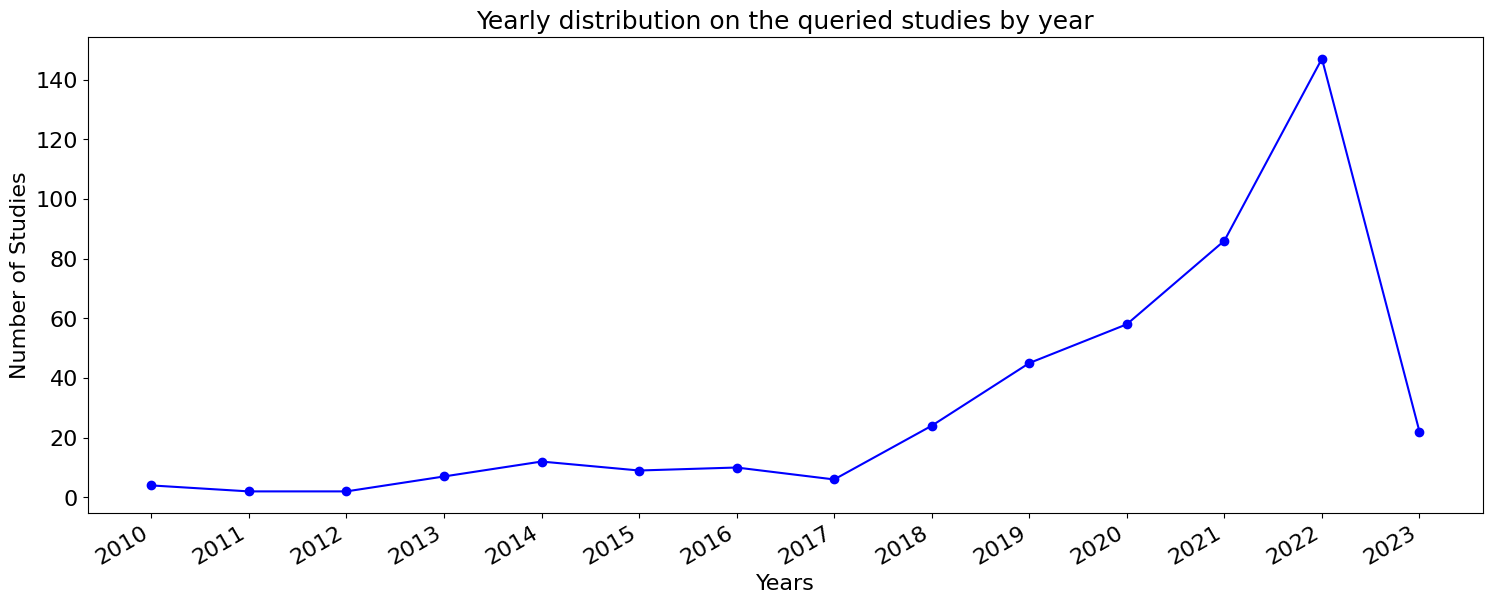

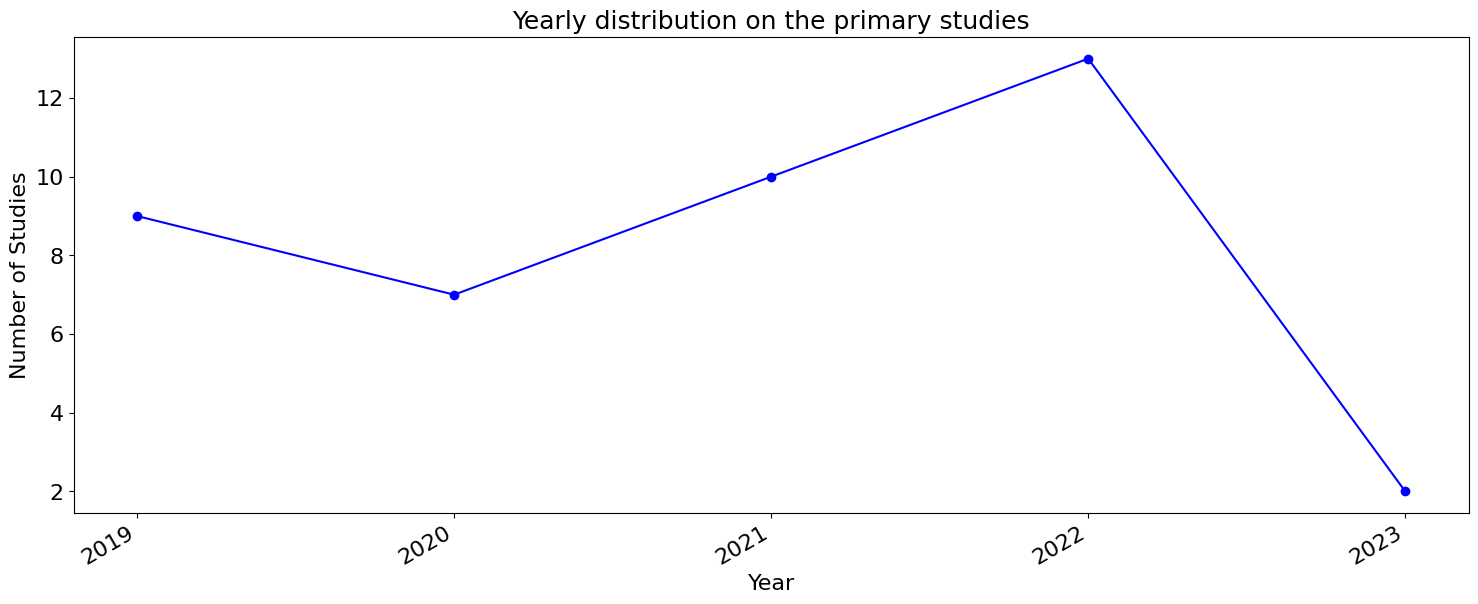

In [7]:
def plot_line(col, xlabel, ylabel, title, save_file):
    x = list(col.value_counts().sort_index().keys().astype(int))
    y = list(col.value_counts().sort_index())
    y_pos = np.arange(len(x))
    
    fig, ax = plt.subplots(figsize=(18,7))
    # ax.bar(y_pos, y, align='center') # bar chart
    ax.plot(y_pos, y, **{'color': 'blue', 'marker': 'o'})
    plt.xticks(y_pos, x)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontsize=GRAPHTITLE_SIZE)
    ax.xaxis_date()
    fig.autofmt_xdate()
    for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(GRAPHTEXT_SIZE)
    plt.savefig(save_file)
    plt.show()
    
def plot_2lines(col, xlabel, ylabel, title, save_file):
    x = list(col.value_counts().sort_index().keys().astype(int))
    y = list(col.value_counts().sort_index())
    y_pos = np.arange(len(x))
    
    fig, ax = plt.subplots(figsize=(18,7))
    # ax.bar(y_pos, y, align='center') # bar chart
    ax.plot(y_pos, y, **{'color': 'blue', 'marker': 'o'})
    plt.xticks(y_pos, x)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, fontsize=GRAPHTITLE_SIZE)
    ax.xaxis_date()
    fig.autofmt_xdate()
    for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(GRAPHTEXT_SIZE)
    plt.savefig(save_file)
    plt.show()
    
# ax.set(xlabel='Year', ylabel='Number of Studies', title='Distribution of the Queried Studies by Year') 
# fig.savefig('result/yearly-distri-all.pdf')
# fig.show()

plot_line(df['Pub. Year'], 'Years', 'Number of Studies', 'Yearly distribution on the queried studies by year', 'result/yearly-distri-all.pdf')
plot_line(df_primary['Pub. Year'], 
         xlabel='Year', 
         ylabel='Number of Studies', 
         title='Yearly distribution on the primary studies', 
         save_file='result/yearly-distri-primary.pdf'
         )

# Yearly distributed on the selected studies:

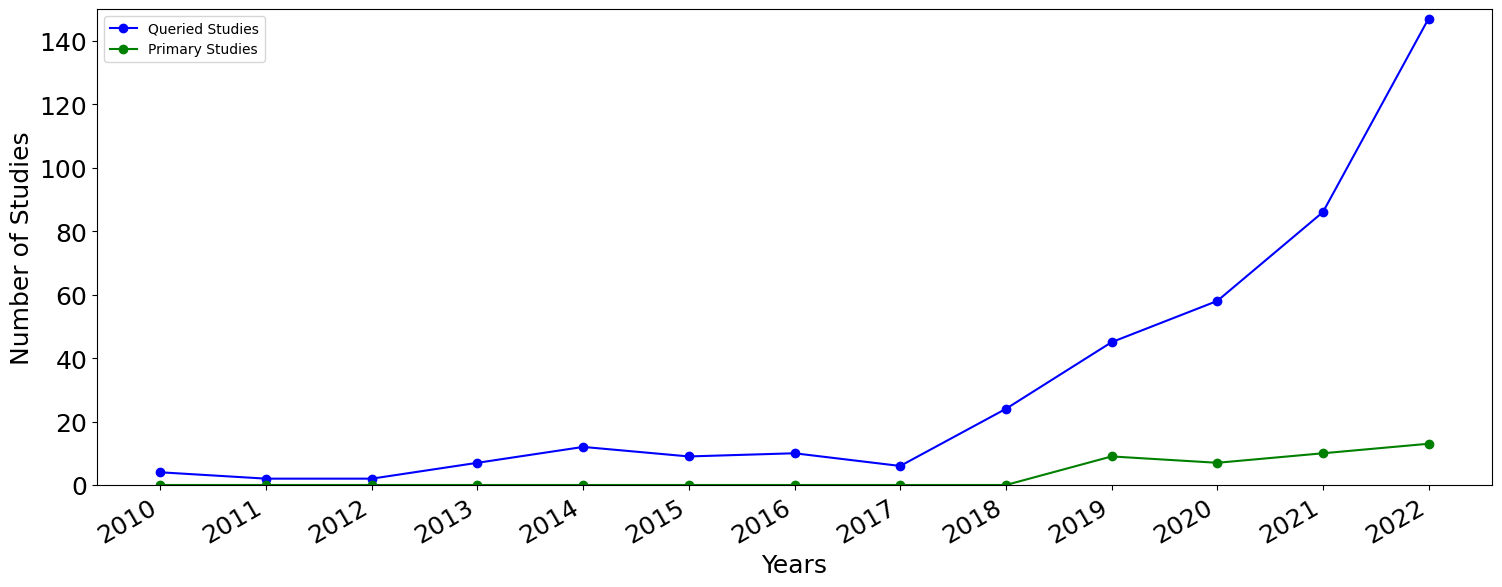

In [8]:

def fill_empty(y1, y2):
    """ fill 0 values if the year does not have any studies """
    new_dict = {}
    for x in iter(y1):
        if x in iter(y2):
            new_dict[x] = y2[x]
        else:
            new_dict[x] = 0
    return new_dict


def plot_2lines(col1, col2, xlabel, ylabel, title, save_file):
    y1 = dict(col1.dropna().astype(int).sort_values().value_counts())
    y2 = dict(col2.astype(int).sort_values().value_counts())

    y1 = pd.Series(fill_empty(y1, y2)).sort_index()
    y2 = df['Pub. Year'].dropna().astype(int).sort_values().value_counts().sort_index()

    x = list(y1.index)
    y_pos = np.arange(len(x))

    fig, ax = plt.subplots(figsize=(18,7))
    ax.plot(y_pos, y2, **{'color': 'blue', 'marker': 'o'}, label = 'Primary Studies')
    ax.plot(y_pos, y1, **{'color': 'green', 'marker': 'o'}, label = 'Queried Studies')
    
    plt.xticks(y_pos, x)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    GRAPHTITLE_SIZE = 20
    GRAPHTEXT_SIZE = 18
    # plt.title(title, fontsize=GRAPHTITLE_SIZE)
    plt.legend(['Queried Studies', 'Primary Studies'], loc='upper left')
    ax.xaxis_date()
    fig.autofmt_xdate()
    ax.set(ylim=(0, 150))
    
    for item in ([ax.xaxis.label, ax.yaxis.label] +
                ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(GRAPHTEXT_SIZE)
    plt.savefig(save_file)
    plt.show()
    
# ax.set(xlabel='Year', ylabel='Number of Studies', title='Distribution of the Queried Studies by Year') 
# fig.savefig('result/yearly-distri-all.pdf')
# fig.show()

# col1 = df.columns[1]
# print(col1)
df = df[df['Pub. Year']!=2023] # ignore the 2023 year to maitain increasing trend
df_primary = df_primary[df_primary['Pub. Year']!=2023] # ignore the 2023 year to maitain increasing trend

plot_2lines(df['Pub. Year'], df_primary['Pub. Year'], 'Years', 'Number of Studies', 'Yearly distribution on the queried studies by year', 'result/yearly-distri-all.pdf')

In [9]:
def save_primary(df_primary, df):
    """ add index row to the primary data sheet from the original dataset, 
    because it was removed while selecting only 'Yes' values. 
    """
    if pd.isna(df_primary.Key[0]):
        return df_primary
    else:
        df_new = df_primary.copy()
        df_new.loc[0] = list(df.iloc[0]) # This line was: df_new.loc[-1] = list(df.iloc[0]) but with errors
        df_new.index  = df_primary.index + 1
        df_new = df_new.sort_index()
        df_new.to_excel('data/primary_copy.xlsx') # do not name it primary.xlsx, otherwise it would replace the file
        return df_new

df_primary = df_primary.sort_index()

# run this once
# save_primary(df_primary, df).head(5)

# Plotting bubble chart to show the distribution of studies on digital libraries

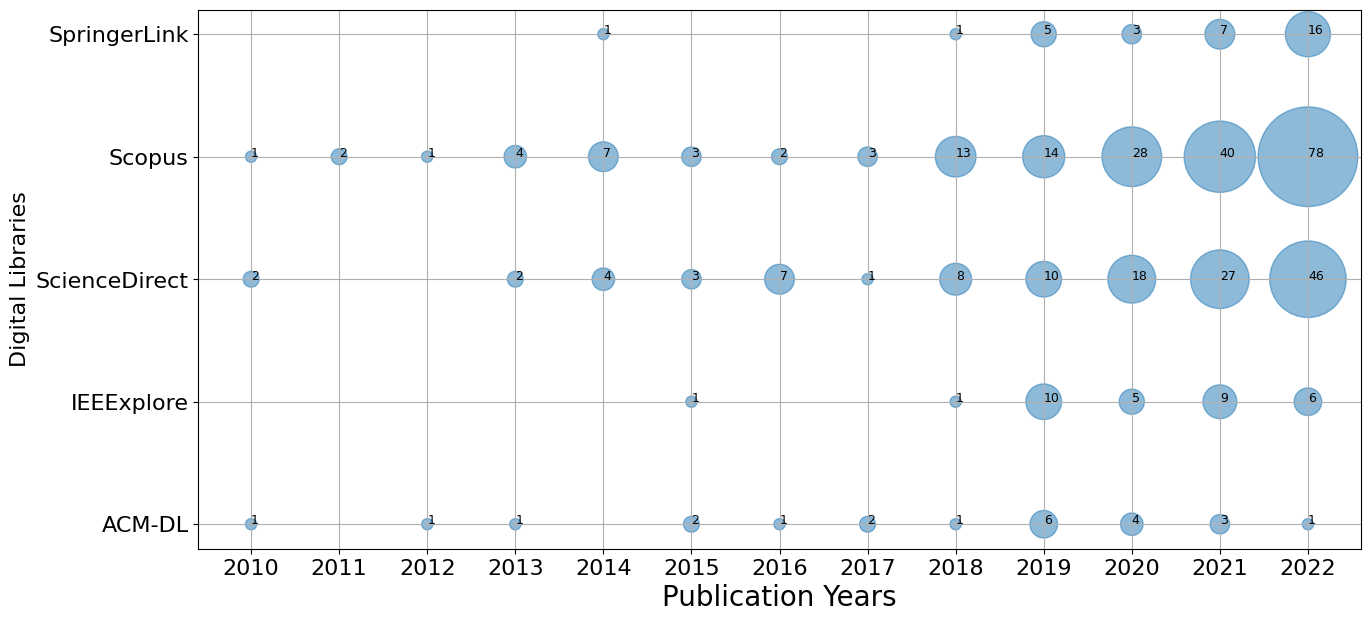

In [10]:
def plot_bubble(df_input, save_file):
    """ plot bubble chart for yearly distribution of digital libraries
    """ 
    df = df_input.copy()
    col0 = df.columns[0]
    col1 = df.columns[1]
    df=df.groupby([col0,col1]).size().reset_index(name='Count')
    df[col1] = df[col1].astype(int)
    df = df[df[col1]!=2023] # ignore the 2023 year to maitain increasing trend
    
    x = list(df[col0])
    y = list(df[col1].astype(int))
    s = list(df['Count']*66)
    plt.rc('font', size=16)

    fig, ax = plt.subplots(figsize=(15, 7))
    ax.scatter(y, x, s, alpha=0.5)
    plt.xticks(np.arange(2010, 2023, 1))
    s = list(df['Count'])
    
    for i, txt in enumerate(s):
        ax.annotate(txt, (y[i], x[i]), size=9)
    
    plt.xlabel("Publication Years", fontsize=20)
    plt.ylabel("Digital Libraries")
    plt.grid()
    plt.savefig('result/' + save_file)
    plt.show()
    
plot_bubble(df[['library', 'Pub. Year']], save_file='dl-bubble.pdf')